In [18]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('advertising.csv')

In [21]:
# Display the first few rows of the dataset
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [22]:
# Check for missing values
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [23]:
# Get summary statistics
print(df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['TV', 'Radio', 'Newspaper']] = scaler.fit_transform(df[['TV', 'Radio', 'Newspaper']])

In [26]:
df['Total_Ad_Budget'] = df['TV'] + df['Radio'] + df['Newspaper']

In [28]:
df['Total_Ad_Budget']

0      3.730320
1      0.555010
2      1.795857
3      2.556310
4      0.834370
         ...   
195   -3.363188
196   -2.890636
197   -1.704941
198    4.500537
199   -1.002939
Name: Total_Ad_Budget, Length: 200, dtype: float64

In [48]:
X = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 2.907756910271093
R-squared: 0.9059011844150825


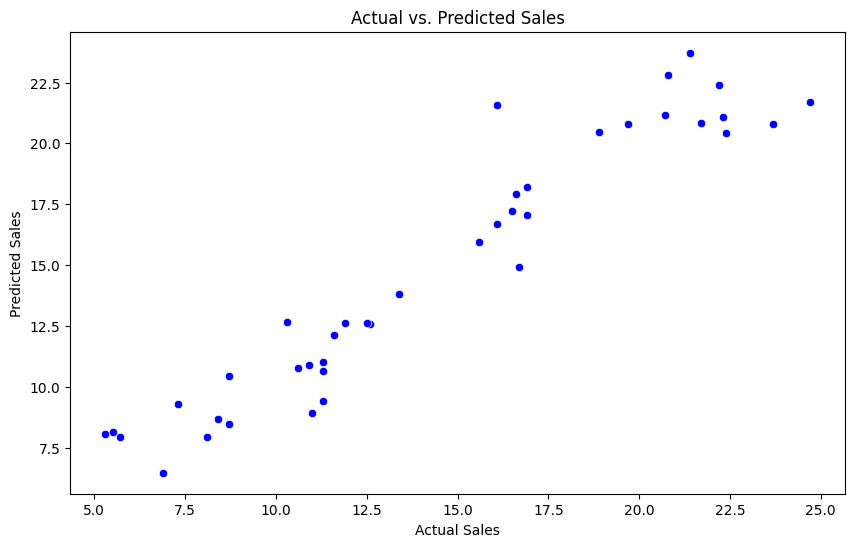

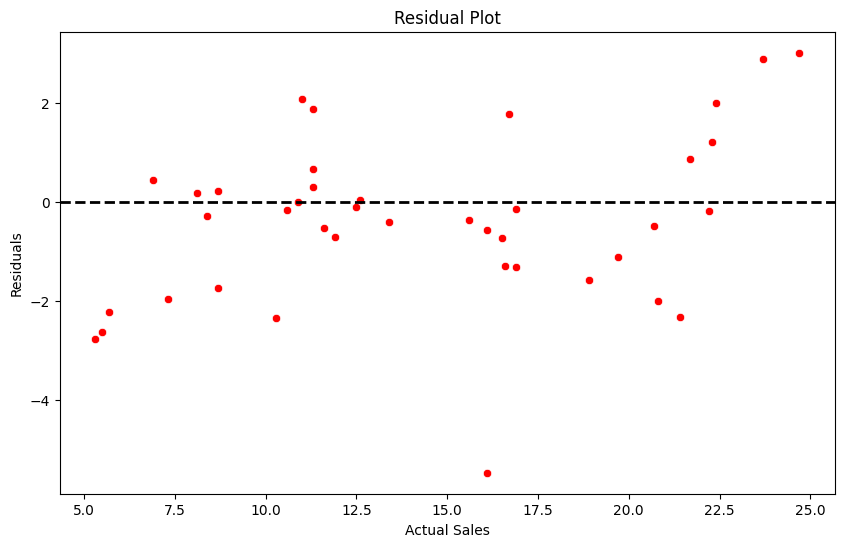

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs. predicted sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.show()

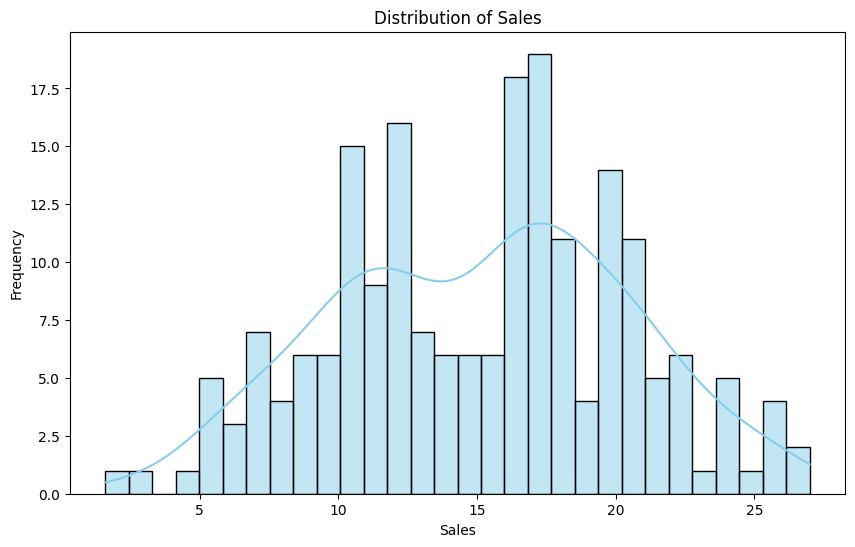

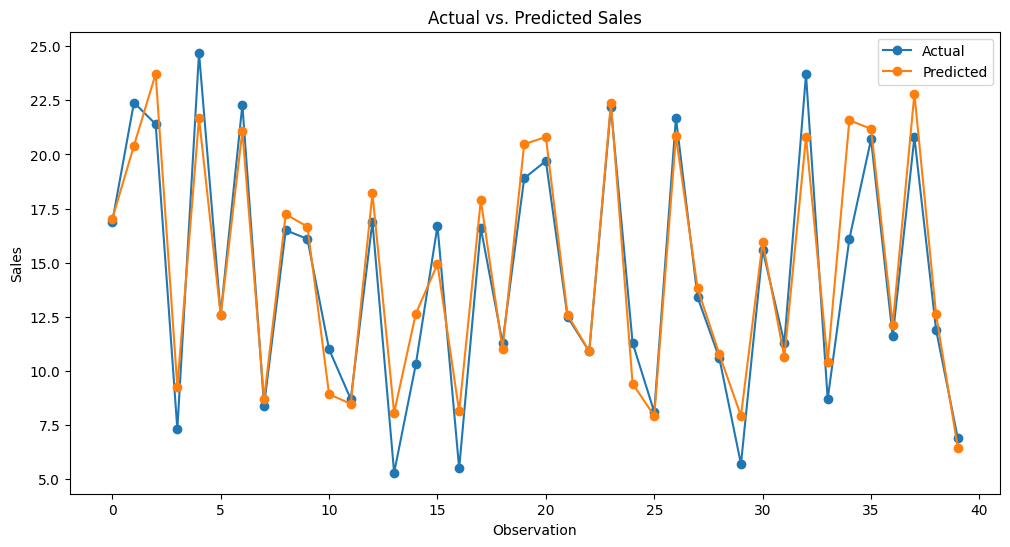

In [53]:
# Distribution of the target variable (Sales)
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Feature Importances (if your model supports it, e.g., for a decision tree-based model)
if hasattr(model, 'feature_importances_'):
    feature_importances = model.feature_importances_
    feature_names = X.columns
    sorted_idx = np.argsort(feature_importances)

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importances')
    plt.show()

# Compare actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='o')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Observation')
plt.ylabel('Sales')
plt.legend()
plt.show()
